# Interaction Testing for Optimizing Neural Network Performance

Interaction testing is most often used to holistically evaluate large systems with various combinations of parameters. In some sense, a neural network can be viewed as such a system. 

## Dataset Orientation and Initial Exploration

First, let's open our dataset, which comes from Kaggle at the following link: https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction/data


In [1]:
import pandas as pd

dataset = pd.read_csv("data/Housing.csv")

dataset.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

Eventually, I want to see a plot of each variable against the other to get an idea of the relationship between each variable. However, this first requires a bti of pre-processing of the data. Primarily, this involves converting yes/no responses into binary values. 

In [2]:
binary_columns = ['mainroad','guestroom','basement','hotwaterheating','airconditioning', 'prefarea']

for col in binary_columns:
    dataset[col] = dataset[col].apply(lambda x: 0 if x == 'no' else 1)

dataset.head()

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

  furnishingstatus  
0        furnished  
1        furnished  
2   semi-furnished  
3        furnished  
4        furnished

The only column left to convert is ```furnishingstatus```, which we'll likewise convert to a numerical value. And yes, later, we'll perform one-hot encoding.

In [3]:
furnishing_matrix = {
    "furnished":2,
    "semi-furnished":1,
    "unfurnished":0
}

dataset['furnishingstatus'] = dataset['furnishingstatus'].apply(lambda x: furnishing_matrix[x])

dataset.head()

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus  
0                 2  
1                 2  
2                 1  
3                 2  
4                 2

Now, to get an idea of the relationships between each variable, let's use seaborn's built-in ```pairplot``` function.

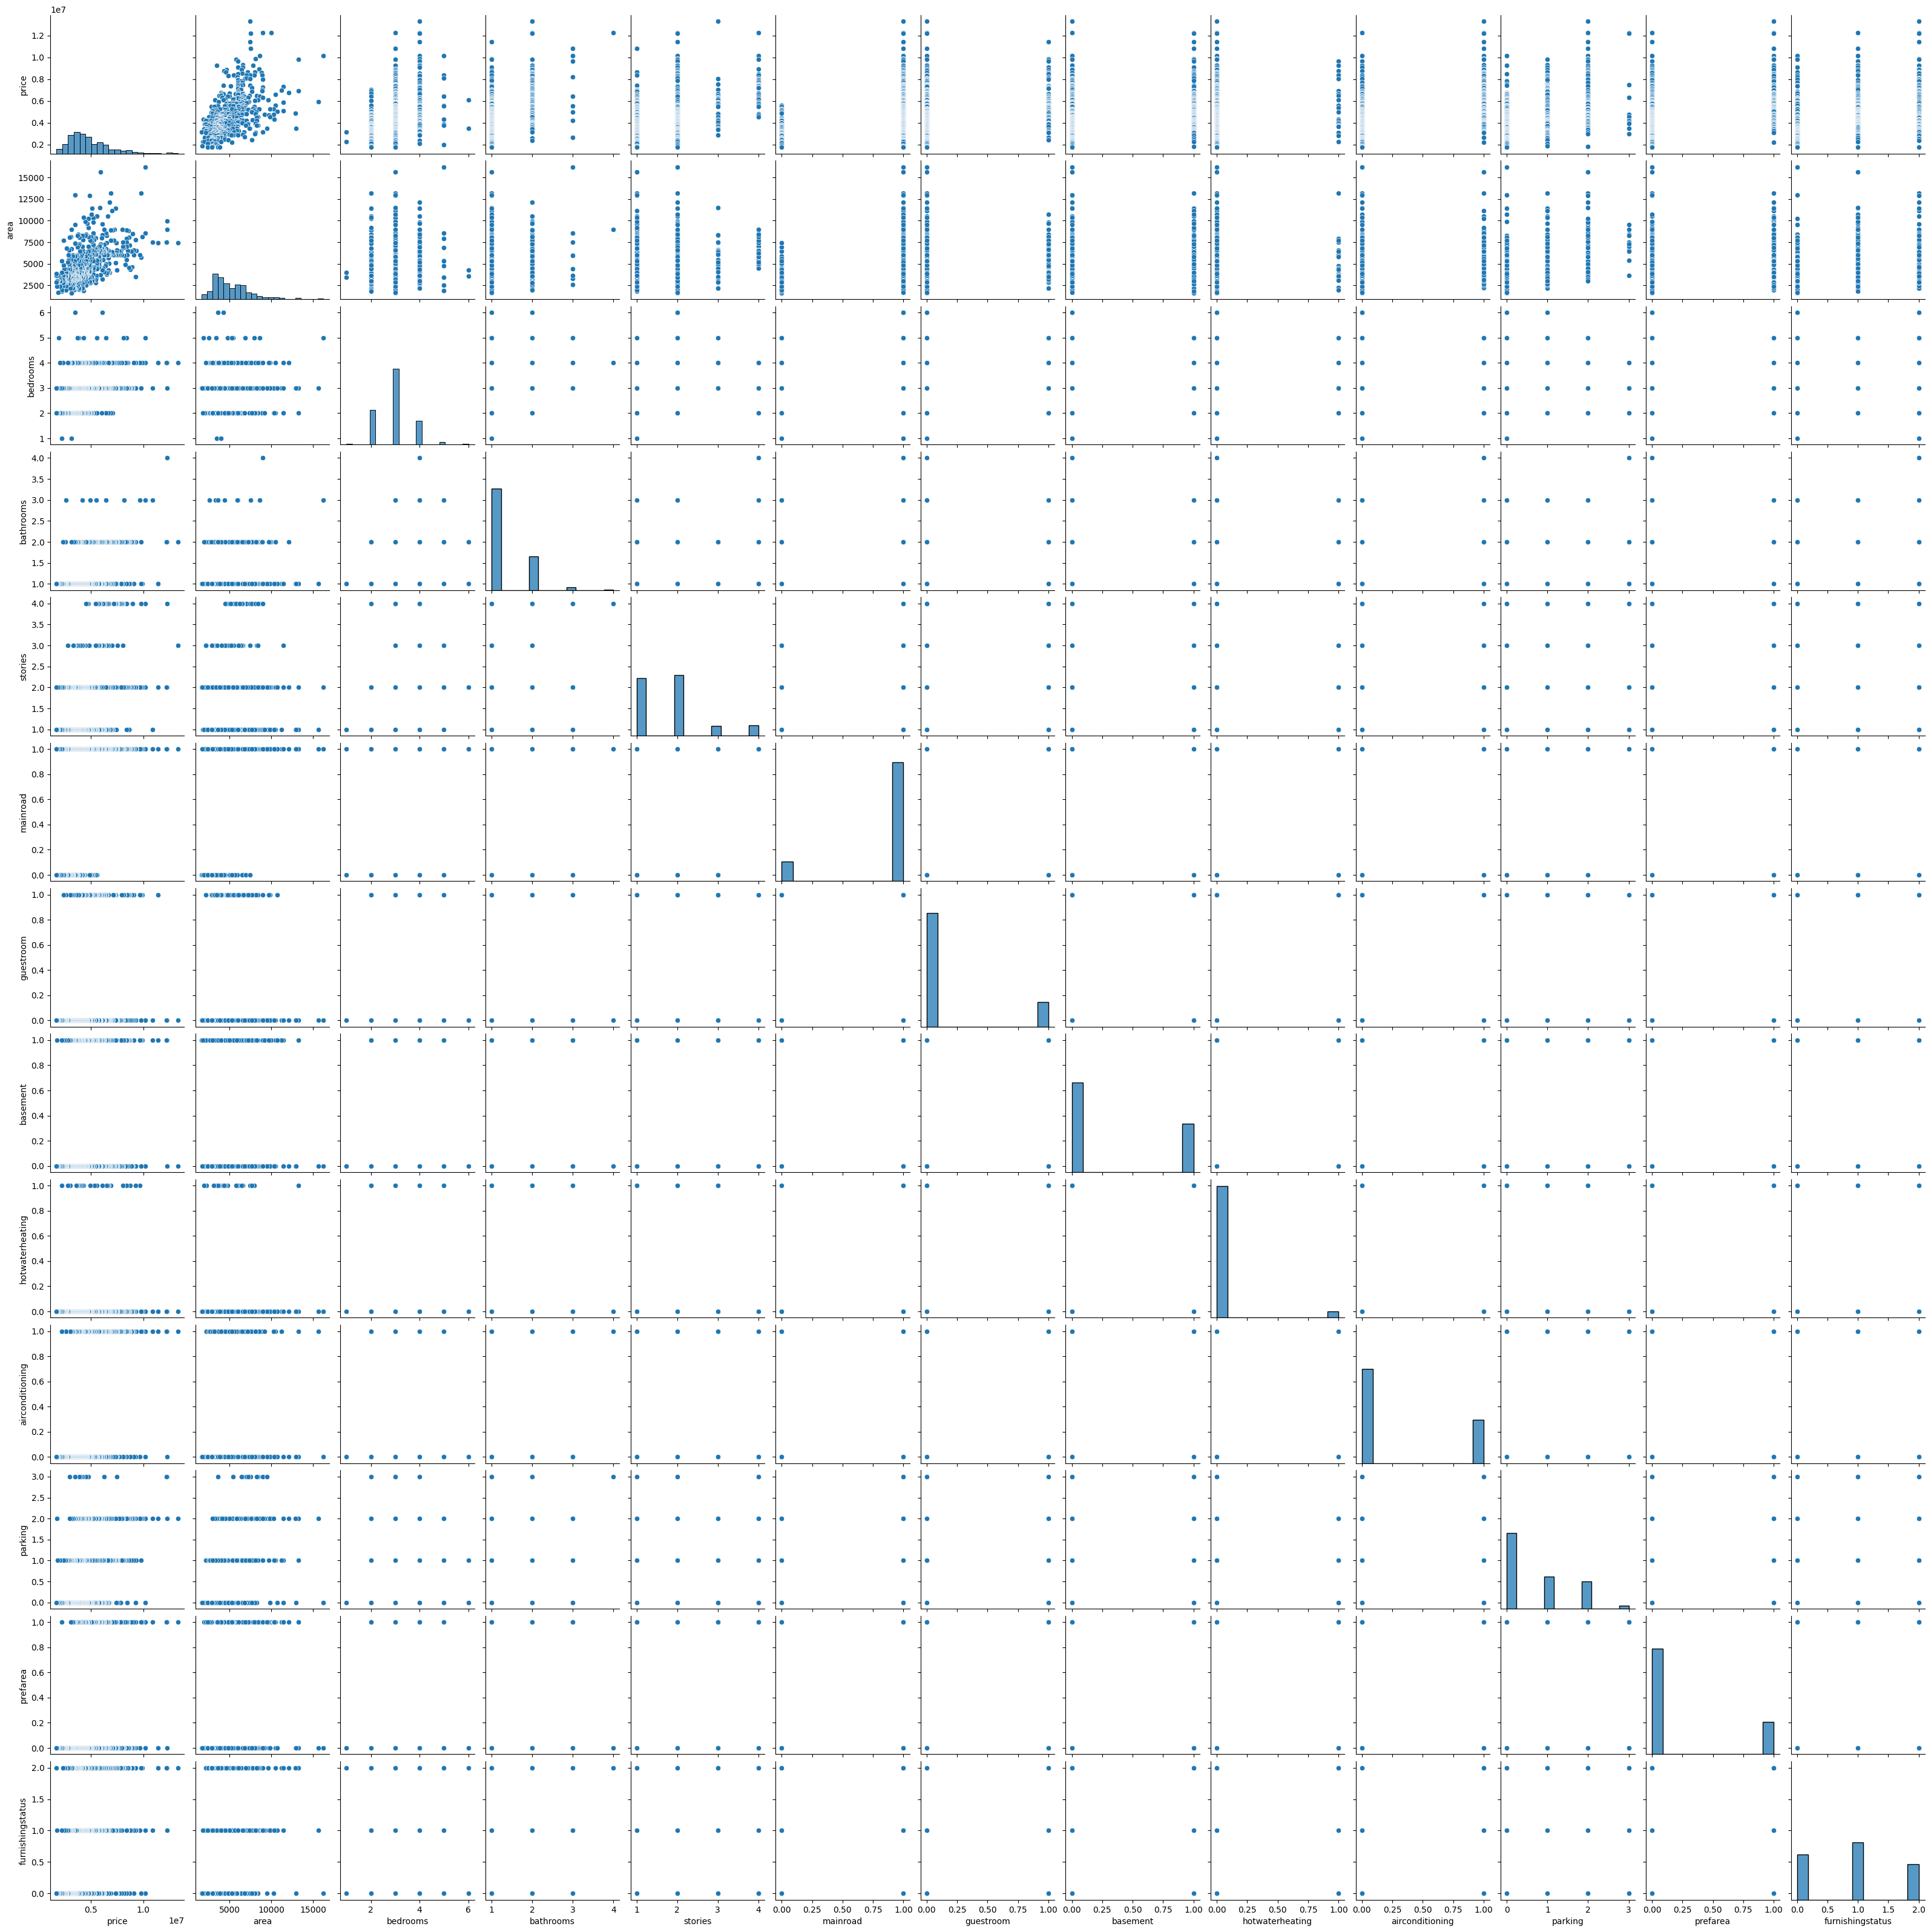

In [4]:
import seaborn as sns

sns.pairplot(dataset)

The most relevant to our course of inquiry is the diagonal line of histograms. Some variables are fairly evenly distributed, such as ```furnishingstatus```, while others are extremely imbalanced, such as ```hotwaterheating```.

Given the prevalence of certain variables over others, it's likely that a model trained on this data would be more accurate for data points that contain variables that show up more often, likely seeing worse performance on rarer variable occurences.

## Building a Baseline Model

Applying the same foundational principle underlying interaction testing to the housing market, it's likely that only a small subset of interactions are responsible for the cost of the house.

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [6]:
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

In [7]:
scaler = StandardScaler()
dataset.iloc[:, 0:2] = scaler.fit_transform(dataset.iloc[:, 0:2])

x_train = dataset.iloc[0:300, 1:]
y_train = dataset['price'][0:300]
x_test = dataset.iloc[300:, 1:]
y_test = dataset['price'][300:]


model = Sequential()
model.add(Dense(64, input_shape = (12,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=[rmse])

model.fit(x_train, y_train, epochs=500, verbose=0)

loss, rmse = model.evaluate(x_train, y_train, verbose=0)
print(f"Model Training Root Mean Squared Error: {rmse:.2f}")

predictions = model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Model Testing RMSE: {rmse:.2f}")
print("Predictions on sample data:")
print(predictions)

C:\Users\nikolas.dykstra\AppData\Local\Temp\ipykernel_25756\3619747156.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 4.56636513e+00  4.00448405e+00  4.00448405e+00  3.98575468e+00
  3.55497918e+00  3.25530927e+00  2.88072189e+00  2.88072189e+00
  2.73088693e+00  2.69342819e+00  2.69342819e+00  2.62974834e+00
  2.43121702e+00  2.39375829e+00  2.39375829e+00  2.31884081e+00
  2.31884081e+00  2.24392333e+00  2.20646459e+00  2.18773522e+00
  2.13154711e+00  2.09408838e+00  2.07535901e+00  2.07535901e+00
  2.03790027e+00  2.01917090e+00  1.97796629e+00  1.94425342e+00
  1.94425342e+00  1.94425342e+00  1.94425342e+00  1.94425342e+00
  1.88806531e+00  1.83187721e+00  1.79441847e+00  1.77351649e+00
  1.75321385e+00  1.71950099e+00  1.71013630e+00  1.68204225e+00
  1.66331288e+00  1.64458351e+00  1.56966604e+00  1.56966604e+00
  1.49474856e+00  1.49474856e+00  1.47601919e+00  1.45728982e+00
  1.43856045e+00  1.41983

Model Training Root Mean Squared Error: 0.04
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Model Testing RMSE: 0.87
Predictions on sample data:
[[-7.88349286e-02]
 [-2.03217342e-01]
 [ 1.28750503e-01]
 [ 6.88477885e-03]
 [-5.00575185e-01]
 [-1.01004168e-01]
 [-1.42553210e-01]
 [-7.35242590e-02]
 [-3.58415954e-02]
 [ 1.15481742e-01]
 [-1.17006972e-01]
 [ 3.96371167e-03]
 [ 9.72942486e-02]
 [-1.93332016e-01]
 [-1.76692791e-02]
 [ 8.46251905e-01]
 [ 4.82585400e-01]
 [ 4.00940776e-01]
 [-1.12492368e-01]
 [ 3.18496943e-01]
 [-8.91238302e-02]
 [ 1.36243272e+00]
 [ 1.53269708e-01]
 [-1.05841197e-01]
 [ 3.18270653e-01]
 [ 1.57941729e-01]
 [-8.08781907e-02]
 [ 5.01172721e-01]
 [ 1.37004292e+00]
 [-8.26261863e-02]
 [ 3.50016318e-02]
 [ 3.72330725e-01]
 [-1.81214631e-01]
 [-2.33871505e-01]
 [-5.64492531e-02]
 [-5.35186715e-02]
 [ 5.27795434e-01]
 [-7.01700225e-02]
 [-8.90852585e-02]
 [-2.18969919e-02]
 [ 2.84619004e-01]
 [-3.57058764e-01]
 [-1.07454672e-01]
 [-1.70681983e-01]
 [-1.89937413e-01]
 [-1.1053